
## House Prices: Advanced Regression Techniques
Steps performed:
1. Data preprocessing to remove missing values 
    
2. Implemented three feature selection algorithms 
    
3. Implemented three regression models for prediction 
    
4. Implemented ensemble based methods for combining models
    
    



In [1]:
load.libraries <- c('data.table', 'testthat', 'gridExtra', 'corrplot', 'GGally', 'ggplot2', 'e1071', 'dplyr','missForest','caret','randomForest','Hmisc','VIM','ranger','Matrix','VARsignR','xgboost','Boruta','Metrics','rpart',
                    'forecast','gbm','keras','moments','tensorflow','xgboost','iterators','parallel','doMC','glmnet','RANN')
install.lib <- load.libraries[!load.libraries %in% installed.packages()]
#for(libs in install.lib) install.packages(libs, dependences = TRUE)
#sapply(load.libraries, require, character = TRUE)

#### Reading the input kaggle data

Combining train and test data for data preprocessing


In [16]:

train<-read.csv("./train.csv")
test<-read.csv("./test.csv")
#combining train and test data for quicker data prep
#train <- train[train$GrLivArea<=4000,]

test$SalePrice <- NA
train$isTrain <- 1
test$isTrain <- 0
df.combined <- rbind(train,test)
 

#### Missing Value Analysis 

#### The percentage of data missing in train.
sum(is.na(train)) / (nrow(train) *ncol(train)) is 0.0581774139659205

#### The percentage of data missing in test.
sum(is.na(test)) / (nrow(test) * ncol(test)) is 0.0707049599625537




In [17]:
#missing values analysis

Missing_indices <- sapply(train,function(x)sum(is.na(x)))
Missing_Summary <- data.frame(index = names(train),Missing_Values=Missing_indices)
Missing_Summary[Missing_Summary$Missing_Values > 0,]
   

,index,Missing_Values
LotFrontage,LotFrontage,259
Alley,Alley,1369
MasVnrType,MasVnrType,8
MasVnrArea,MasVnrArea,8
BsmtQual,BsmtQual,37
BsmtCond,BsmtCond,37
BsmtExposure,BsmtExposure,38
BsmtFinType1,BsmtFinType1,37
BsmtFinType2,BsmtFinType2,38
Electrical,Electrical,1


There are lots of NA in the data. But most of them cannot be removed randomly as they provide vital information about the data. So, imputing data as per the feature requirement with 'NONE' or median

In [18]:
df.combined$MasVnrArea[which(is.na(df.combined$MasVnrArea))] <- mean(df.combined$MasVnrArea,na.rm=T)
# Changing NA in Alley to None
df.combined$Alley1 <- as.character(df.combined$Alley)
df.combined$Alley1[which(is.na(df.combined$Alley))] <- "None"
table(df.combined$Alley1)
df.combined$Alley <- as.factor(df.combined$Alley1)
df.combined <- subset(df.combined,select = -Alley1)
# Changing NA in MasVnrType to None
df.combined$MasVnrType1 <- as.character(df.combined$MasVnrType)
df.combined$MasVnrType1[which(is.na(df.combined$MasVnrType))] <- "None"
df.combined$MasVnrType <- as.factor(df.combined$MasVnrType1)
df.combined <- subset(df.combined,select = -MasVnrType1)
table(df.combined$MasVnrType)
# Imputing missing Lot Frontage by the median
df.combined$LotFrontage[which(is.na(df.combined$LotFrontage))] <- median(df.combined$LotFrontage,na.rm = T)

# Changing NA in FireplaceQu to None
df.combined$FireplaceQu1 <- as.character(df.combined$FireplaceQu)
df.combined$FireplaceQu1[which(is.na(df.combined$FireplaceQu))] <- "None"
df.combined$FireplaceQu <- as.factor(df.combined$FireplaceQu1)
df.combined <- subset(df.combined,select = -FireplaceQu1)

# Changing NA in PoolQC to None
df.combined$PoolQC1 <- as.character(df.combined$PoolQC)
df.combined$PoolQC1[which(is.na(df.combined$PoolQC))] <- "None"
df.combined$PoolQC <- as.factor(df.combined$PoolQC1)
df.combined <- subset(df.combined,select = -PoolQC1)

# Changing NA in Fence to None
df.combined$Fence1 <- as.character(df.combined$Fence)
df.combined$Fence1[which(is.na(df.combined$Fence))] <- "None"
df.combined$Fence <- as.factor(df.combined$Fence1)
df.combined <- subset(df.combined,select = -Fence1)

# Changing NA in MiscFeature to None
df.combined$MiscFeature1 <- as.character(df.combined$MiscFeature)
df.combined$MiscFeature1[which(is.na(df.combined$MiscFeature))] <- "None"
df.combined$MiscFeature <- as.factor(df.combined$MiscFeature1)
df.combined <- subset(df.combined,select = -MiscFeature1)

# Changing NA in GarageType to None
df.combined$GarageType1 <- as.character(df.combined$GarageType)
df.combined$GarageType1[which(is.na(df.combined$GarageType))] <- "None"
df.combined$GarageType <- as.factor(df.combined$GarageType1)
df.combined <- subset(df.combined,select = -GarageType1)

# Changing NA in GarageYrBlt to None
df.combined$GarageYrBlt[which(is.na(df.combined$GarageYrBlt))] <- 0 

# Changing NA in GarageFinish to None
df.combined$GarageFinish1 <- as.character(df.combined$GarageFinish)
df.combined$GarageFinish1[which(is.na(df.combined$GarageFinish))] <- "None"
df.combined$GarageFinish <- as.factor(df.combined$GarageFinish1)
df.combined <- subset(df.combined,select = -GarageFinish1)

# Changing NA in GarageQual to None
df.combined$GarageQual1 <- as.character(df.combined$GarageQual)
df.combined$GarageQual1[which(is.na(df.combined$GarageQual))] <- "None"
df.combined$GarageQual <- as.factor(df.combined$GarageQual1)
df.combined <- subset(df.combined,select = -GarageQual1)

# Changing NA in GarageCond to None
df.combined$GarageCond1 <- as.character(df.combined$GarageCond)
df.combined$GarageCond1[which(is.na(df.combined$GarageCond))] <- "None"
df.combined$GarageCond <- as.factor(df.combined$GarageCond1)
df.combined <- subset(df.combined,select = -GarageCond1)

# Changing NA in BsmtQual to None
df.combined$BsmtQual1 <- as.character(df.combined$BsmtQual)
df.combined$BsmtQual1[which(is.na(df.combined$BsmtQual))] <- "None"
df.combined$BsmtQual <- as.factor(df.combined$BsmtQual1)
df.combined <- subset(df.combined,select = -BsmtQual1)

# Changing NA in BsmtCond to None
df.combined$BsmtCond1 <- as.character(df.combined$BsmtCond)
df.combined$BsmtCond1[which(is.na(df.combined$BsmtCond))] <- "None"
df.combined$BsmtCond <- as.factor(df.combined$BsmtCond1)
df.combined <- subset(df.combined,select = -BsmtCond1)

# Changing NA in BsmtExposure to None
df.combined$BsmtExposure1 <- as.character(df.combined$BsmtExposure)
df.combined$BsmtExposure1[which(is.na(df.combined$BsmtExposure))] <- "None"
df.combined$BsmtExposure <- as.factor(df.combined$BsmtExposure1)
df.combined <- subset(df.combined,select = -BsmtExposure1)

# Changing NA in BsmtFinType1 to None
df.combined$BsmtFinType11 <- as.character(df.combined$BsmtFinType1)
df.combined$BsmtFinType11[which(is.na(df.combined$BsmtFinType1))] <- "None"
df.combined$BsmtFinType1 <- as.factor(df.combined$BsmtFinType11)
df.combined <- subset(df.combined,select = -BsmtFinType11)
# Changing NA in BsmtFinType2 to None
df.combined$BsmtFinType21 <- as.character(df.combined$BsmtFinType2)
df.combined$BsmtFinType21[which(is.na(df.combined$BsmtFinType2))] <- "None"
df.combined$BsmtFinType2 <- as.factor(df.combined$BsmtFinType21)
df.combined <- subset(df.combined,select = -BsmtFinType21)

# Changing NA in Electrical to None
df.combined$Electrical1 <- as.character(df.combined$Electrical)
df.combined$Electrical1[which(is.na(df.combined$Electrical))] <- "None"
df.combined$Electrical <- as.factor(df.combined$Electrical1)
df.combined <- subset(df.combined,select = -Electrical1)


Grvl None Pave 
 120 2721   78 


 BrkCmn BrkFace    None   Stone 
     25     879    1766     249 

In [19]:
levels(df.combined$MSZoning) <- c(levels(df.combined$MSZoning),"None")
levels(df.combined$Utilities) <- c(levels(df.combined$Utilities),"None","NoSeWa")
levels(df.combined$Exterior1st) <- c(levels(df.combined$Exterior1st),"None","ImStucc","Stone")
levels(df.combined$Exterior2nd) <- c(levels(df.combined$Exterior2nd),"None","Other")
levels(df.combined$KitchenQual) <- c(levels(df.combined$KitchenQual),"None")
levels(df.combined$Functional) <- c(levels(df.combined$Functional),"None")
levels(df.combined$SaleType) <- c(levels(df.combined$SaleType),"None")

### Plotting SalePrice data
                                 

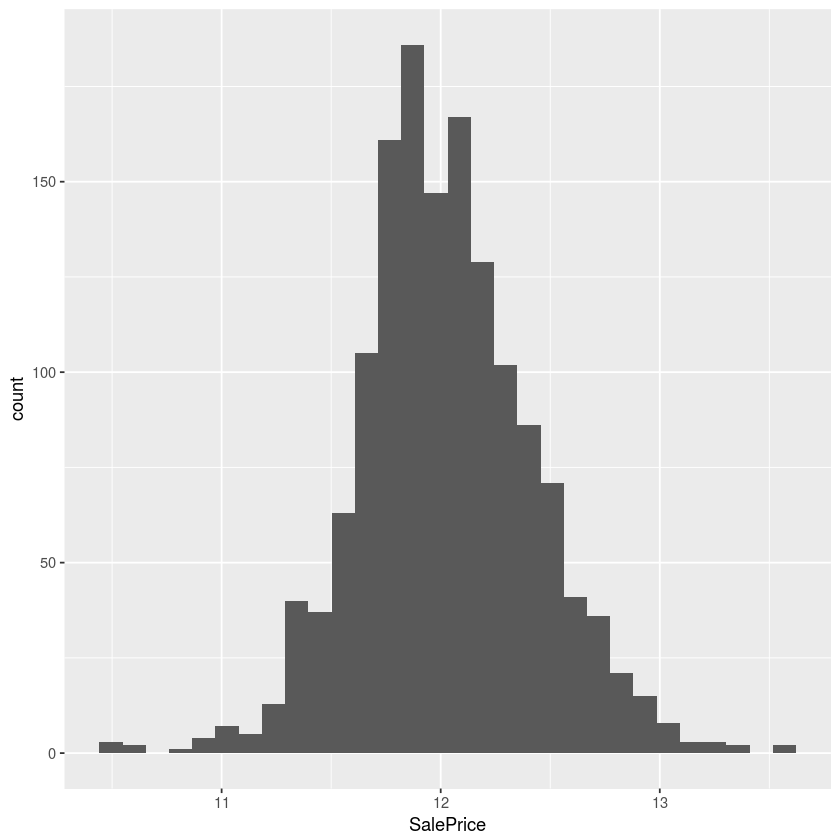
                        




In [20]:
#computing log for skewed numeric features

Column_classes <- sapply(names(df.combined),function(x){class(df.combined[[x]])})
numeric_columns <-names(Column_classes[Column_classes != "factor"])
#determining skew of each numric variable
skew <- sapply(numeric_columns,function(x){skewness(df.combined[[x]],na.rm = T)})
# Let us determine a threshold skewness and transform all variables above the treshold.
skew <- skew[skew > 0.75]

# transform excessively skewed features with log(x + 1)
 for(x in names(skew)) {
   df.combined[[x]] <- log(df.combined[[x]] + 1)
 }
#tail(df.combined, n=1020)

ERROR: Error in skewness(df.combined[[x]], na.rm = T): could not find function "skewness"


Removing all the features where more than 80% data is NA.


In [ ]:

df.combined$PoolQC=NULL
df.combined$MiscFeature=NULL
df.combined$Alley=NULL
df.combined$Fence=NULL
df.combined$FireplaceQu=NULL
df.combined$LotFrontage=NULL
#df.combined$Id=NULL
train <- train[train$GrLivArea<=4000,]


### Classifying back combined data into training and testing

In [ ]:
train_new <- df.combined[df.combined$isTrain==1,]
test_new <- df.combined[df.combined$isTrain==0,]
smp_size <- floor(0.75 * nrow(train))

## setting the seed to make the partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(train_new)), size = smp_size)

train_new2 <- train_new[train_ind, ]
validate <- train_new[-train_ind, ]
train_new2 <- subset(train_new2,select=-c(Id,isTrain))
validate <- subset(validate,select=-c(Id,isTrain))
#nrow(train_new2)
#nrow(validate)
#str(train_new2)
#dim(train_new2)
#train_new2[,1:74]
#test_new$SalePrice=NULL

In [ ]:
#checking again missing values in train data 
#Missing_indices <- sapply(test_new,function(x)sum(is.na(x)))
#Missing_Summary <- data.frame(index = names(test_new),Missing_Values=Missing_indices)
Missing_Summary[Missing_Summary$Missing_Values > 0,]


In [ ]:
# we can split dataset into categorical and continuous 

house_price_cat<-train_new[, sapply(train_new, is.factor)]
house_price_num<-train_new[, sapply(train_new, is.numeric)]
house_price_num$isTRain=NULL




In [ ]:
###Checking relationship between numerical variables after data imputation
###Checking relationship between numerical variables after data imputation
Correlation<-cor(na.omit(house_price_num))
corrplot(Correlation, method = "square")
Correlation


Subsettting the high correlation variable with predictor variable.

predict_var<-house_price_num[c("OverallQual","TotalBsmtSF","X1stFlrSF", "GrLivArea", "GarageArea","GarageCars","SalePrice")]


plot(predict_var)


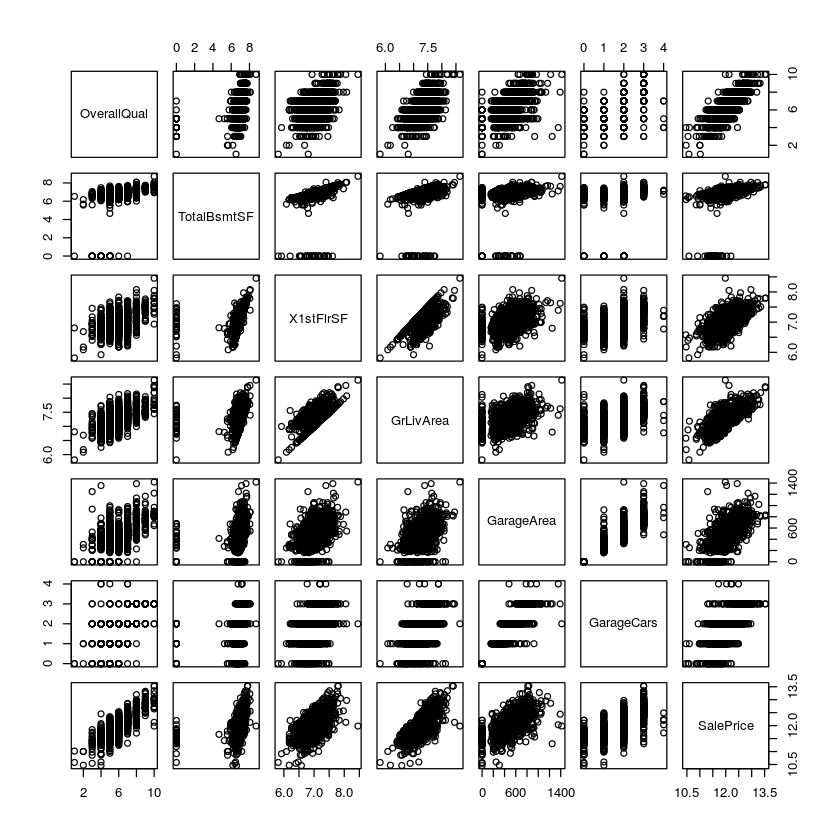

## Feature Selection

Three feature selection algorithms have been implemented in this work
1. Boruta Analysis
2. Ranking based feature selection
3. Recursive featur elimination

#### 1. Boruta Analysis:
This technique is important when a data set comprised of several variables is given for 
model building. It works as a wrapper algorithm around Random Forest.

ID.VAR <- "Id"

TARGET.VAR <- "SalePrice"

#extract only candidate feature names

candidate.features <- setdiff(names(train_new2),c(ID.VAR,TARGET.VAR))

data.type <- sapply(candidate.features,function(x){class(train_new2[[x]])})

table(data.type)

#deterimine data types

explanatory.attributes <- setdiff(names(train_new2),c(ID.VAR,TARGET.VAR))

data.classes <- sapply(explanatory.attributes,function(x){class(train_new2[[x]])})

#categorize data types in the data set

unique.classes <- unique(data.classes)

attr.data.types <- lapply(unique.classes,function(x){names(data.classes[data.classes==x])})

names(attr.data.types) <- unique.classes

 computing the response variable

response <- train_new2$SalePrice

removing identifier and response variables

sample.df <- train_new2[candidate.features]

for numeric set missing values to -1 for purposes of the random forest run

for (x in attr.data.types$integer){

  train_new2[[x]][is.na(train_new2[[x]])] <- -1
}

for (x in attr.data.types$character){

  train_new2[[x]][is.na(train_new2[[x]])] <- "*MISSING*"
}


set.seed(13)
bor.results <- Boruta(sample.df,response,
                   maxRuns=101,
                   doTrace=0)



  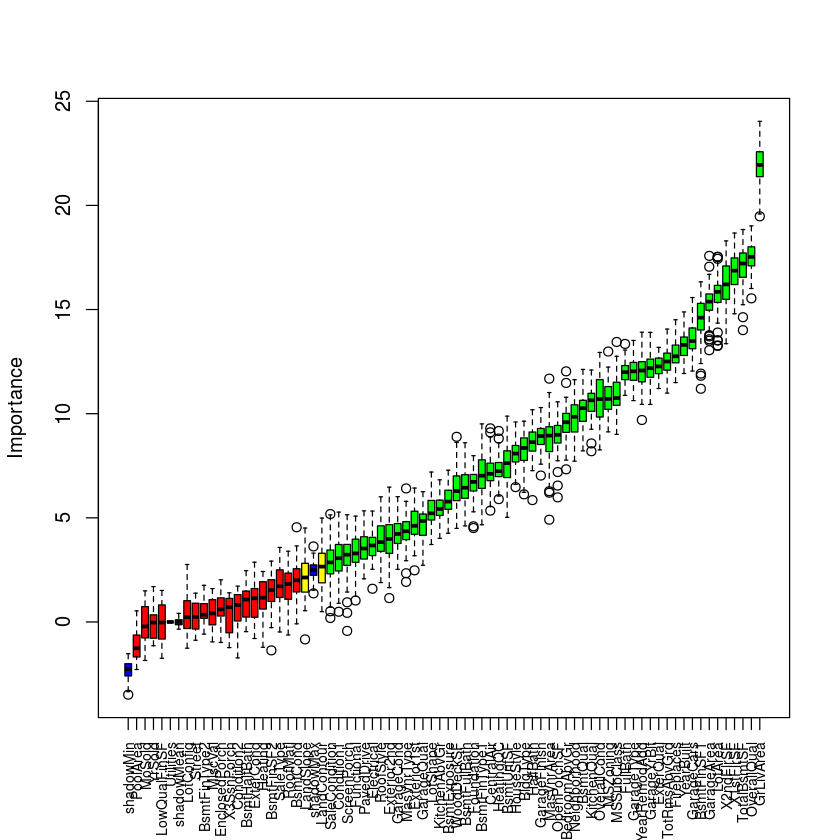
    
The x-axis represents variables. Green color indicates the attributes that are relevant to prediction. Red indicates attributes that are not relevant. Yellow color indicates attributes that may or may not be relevant to predicting the response variable. 
    

The x-axis represents variables. Green color indicates the attributes that are relevant
to prediction. Red indicates attributes that are not relevant. Yellow color 
indicates attributes that may or may not be relevant to predicting the response variable. 

#### 2. Feature selection using Ranking

The ranking algorithm constructs a  generalized linear model via penalized maximum likelihood(glmnet) model. The varImp is then used to estimate the variable importance, which is printed and plotted. It shows that theGrLivArea, OverallQual , YearBuilt, LotArea are the top 4 most important attributes in the dataset and the NeighborhoodSomerst  attribute is the least important.




Prepare training scheme

control <- trainControl(method="repeatedcv", number=10, repeats=3)

train the model
model_ranking <- train(SalePrice~., data=df.combined, method="glmnet", preProcess="scale", trControl=control)

estimate variable importance
importance <- varImp(model_ranking, scale=FALSE)

summarize importance
print(importance)

plot(importance)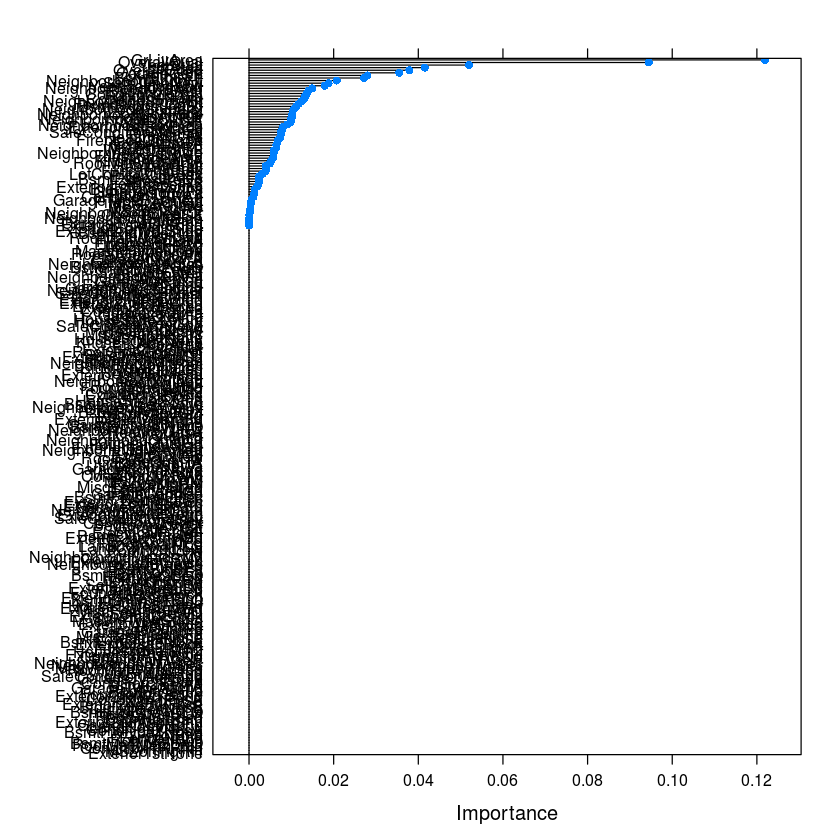

set.seed(123)

control <- rfeControl(functions=rfFuncs, method="cv", number=10)

rfe.train <- rfe(train_new2[,2:12], train_new2[,13], sizes=1:12, rfeControl=control)



#### Only 20 most important variables shown (out of 82)

GrLivArea 0.12192 OverallQual 0.09445 YearBuilt 0.05197 LotArea 0.04154 OverallCond 0.03788 GarageCars 0.03548 X1stFlrSF 0.02796 BsmtFinSF1 0.02712 NeighborhoodNridgHt 0.02071 SaleTypeNew 0.01880 YearRemodAdd 0.01788 NeighborhoodCrawfor 0.01492 BsmtFullBath 0.01402 Condition2PosN 0.01365 FunctionalTyp 0.01318 Condition1Norm 0.01312 NeighborhoodStoneBr 0.01237 FoundationPConc 0.01176 BsmtExposureGd 0.01115 NeighborhoodSomerst 0.01058

#### 3. Recursive Feature Selection (RFE)

set.seed(7)

load the library
library(mlbench)
library(caret)

define the control using a random forest selection function
control <- rfeControl(functions=rfFuncs, method="cv", number=10)

 run the RFE algorithm
results <- rfe(train_new[,1:81], train_new[,81], sizes=c(1:80), rfeControl=control)

summarize the results
print(results)

list the chosen features
predictors(results)

plot the results
plot(results, type=c("g", "o"))

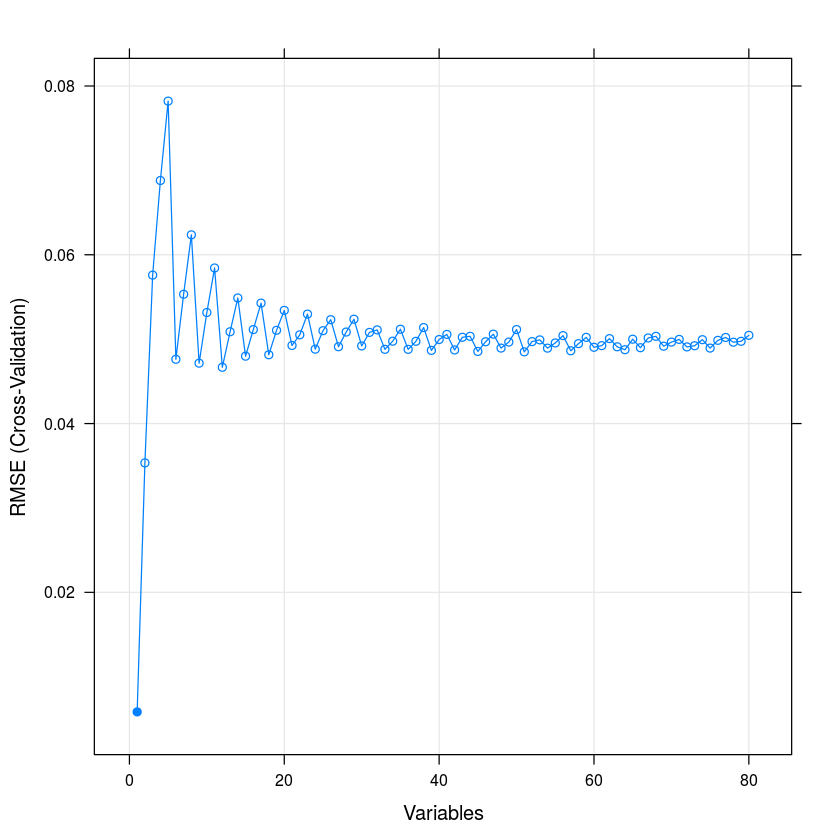

 #### RFE projected the below entioned features as top 10 eatures.
'MSSubClass' 'LotArea' 'LotFrontage' 'MSZoning' 'LotShape' 'Alley' 'LandContour' 'Street' 'Utilities' 

#### The features given from Boruta analysis is taken for further analysis in this experiment
as it is easily converges on large feature set data.Boruta follows an all-relevant feature selection method where it captures all features which are in some circumstances relevant to the outcome variable. In contrast, most of the traditional feature selection algorithms follow a minimal optimal method where they rely on a small 
subset of features which yields a minimal error on a chosen classifier.
    

Performing some more prcessing of missing data as test set still has some NA left.

In [ ]:
# Changing NAs to "None" or 0
df.combined$MSZoning1 <- as.character(df.combined$MSZoning)
df.combined$MSZoning1[which(is.na(df.combined$MSZoning))] <- "None"
df.combined$MSZoning <- as.factor(df.combined$MSZoning1)
df.combined <- subset(df.combined,select = -MSZoning1)

df.combined$Utilities1 <- as.character(df.combined$Utilities)
df.combined$Utilities1[which(is.na(df.combined$Utilities))] <- "None"
df.combined$Utilities <- as.factor(df.combined$Utilities1)
df.combined <- subset(df.combined,select = -Utilities1)

df.combined$Exterior1st1 <- as.character(df.combined$Exterior1st)
df.combined$Exterior1st1[which(is.na(df.combined$Exterior1st))] <- "None"
df.combined$Exterior1st <- as.factor(df.combined$Exterior1st1)
df.combined <- subset(df.combined,select = -Exterior1st1)

df.combined$Exterior2nd1 <- as.character(df.combined$Exterior2nd)
df.combined$Exterior2nd1[which(is.na(df.combined$Exterior2nd))] <- "None"
df.combined$Exterior2nd <- as.factor(df.combined$Exterior2nd1)
df.combined <- subset(df.combined,select = -Exterior2nd1)

df.combined$BsmtFinSF1[which(is.na(df.combined$BsmtFinSF1))] <- 0
df.combined$BsmtFinSF2[which(is.na(df.combined$BsmtFinSF2))] <- 0
df.combined$TotalBsmtSF[which(is.na(df.combined$TotalBsmtSF))] <- 0
df.combined$BsmtUnfSF[which(is.na(df.combined$BsmtUnfSF))] <- 0
df.combined$BsmtFullBath[which(is.na(df.combined$BsmtFullBath))] <- 0
df.combined$BsmtHalfBath[which(is.na(df.combined$BsmtHalfBath))] <- 0



df.combined$KitchenQual1 <- as.character(df.combined$KitchenQual)
df.combined$KitchenQual1[which(is.na(df.combined$KitchenQual))] <- "None"
df.combined$KitchenQual <- as.factor(df.combined$KitchenQual1)
df.combined <- subset(df.combined,select = -KitchenQual1)

df.combined$Functional1 <- as.character(df.combined$Functional)
df.combined$Functional1[which(is.na(df.combined$Functional))] <- "None"
df.combined$Functional <- as.factor(df.combined$Functional1)
df.combined <- subset(df.combined,select = -Functional1)

df.combined$GarageCars[which(is.na(df.combined$GarageCars))] <- 0
df.combined$GarageArea[which(is.na(df.combined$GarageArea))] <- 0

df.combined$SaleType1 <- as.character(df.combined$SaleType)
df.combined$SaleType1[which(is.na(df.combined$SaleType))] <- "None"
df.combined$SaleType <- as.factor(df.combined$SaleType1)
df.combined <- subset(df.combined,select = -SaleType1)
#df.combined$SalePrice[which(is.na(df.combined$SalePrice))] <- 0

## Data Analysis

In [ ]:
#Initial feature profile Profile from boruta analysis 

CONFIRMED_ATTR <- c("MSSubClass","MSZoning","LotArea","LandContour","Neighborhood",
                    "BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt",
                    "YearRemodAdd","Exterior1st","Exterior2nd","MasVnrArea","ExterQual",
                    "Foundation","BsmtFinSF1","TotalBsmtSF","HeatingQC","CentralAir",
                    "X1stFlrSF","X2ndFlrSF","GrLivArea","BsmtFullBath","FullBath","HalfBath",
                    "BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Functional",
                    "Fireplaces","GarageYrBlt",
                    "GarageCars","GarageArea","PavedDrive","WoodDeckSF",
                    "OpenPorchSF","SalePrice")

# construct subset of train dataset that is used for confirmed attributes
select_train <- train_new2[,CONFIRMED_ATTR]
select_val <- validate[,CONFIRMED_ATTR]
select_test<-test_new[,CONFIRMED_ATTR]

#train_dl <- train_new2[,CONFIRMED_ATTR]
#test_dl <-validate[,CONFIRMED_ATTR]
# Evaluation metric function
RMSE <- function(x,y){
    a <- sqrt(sum((log(x)-log(y))^2)/length(y))
    return(a)
}


### Model 1: Regression Trees

In [ ]:
#### R, Regression Trees, function rpart(), method "anova" ####
model_rf <- rpart(SalePrice ~., data = select_train, method = "anova")
pred_rt <- predict(model, select_val)
#actual_pred <- exp(pred_rt)-1
hist(actual_pred)
# RMSE
RMSE_rt <- RMSE(pred_rt,select_val$SalePrice)
RMSE_rt <- round(RMSE1, digits = 3)
#plot1 <- predict-select_test$SalePrice
RMSE_rt

#summary(model)
#9.537

### Model 2. Random Forest

In [ ]:
library(randomForest)
forest <- randomForest(SalePrice~.,select_train)
varImpPlot(forest)
pred_forest <- predict(forest,select_val)
rmse_forest <- sqrt(mean((log(prediction)-log(select_val$SalePrice))^2))
rmse_forest

testing trained network on kaggle test data 

In [ ]:
prediction <- predict(forest,select_test)
#prediction[which(is.na(prediction))] <- mean(prediction,na.rm=T)
submit <- data.frame(Id=test_new$Id,SalePrice=prediction)
write.csv(submit,file="randomF.csv",row.names=F)


### Model 3.  Deep Neural Network

In [ ]:

#One hot encoding for Training data set
dummy <- dummyVars(" ~ .",data=select_train)
train_trans <- data.frame(predict(dummy,newdata=select_train))
#dim(train_trans)
#head(train_trans)

#One hot encoding for val data set
dummy_test <- dummyVars(" ~ .",data=select_val)
test_trans <- data.frame(predict(dummy,newdata=select_val))

#one hot encoding test dataset
dummy_test <- dummyVars(" ~ .",data=select_test)
test_trans1 <- data.frame(predict(dummy,newdata=select_test))


In [ ]:
#deep learning module 
#separating train and test file


train_x<-train_trans
train_y<-train_trans$SalePrice
test_x<-test_trans
test_y<-test_trans$SalePrice

Test_x<-test_trans1
#x <- c(39,39,39,39,20,15,15,20,20,1, 39,39, 39,20,20,15,15,10,10,1, )
X= matrix(  c(39,39,39,39,20,15,15,20,20,1,39,39, 39,20,20,15,15,10,10,1,38,38,38,38,30,30,20,15,15,1),
           nrow=3,ncol=10)


In [ ]:
#defining a keras sequential model
set.seed(1000)
model <-keras_model_sequential()
learning_rate = 0.0001
#defining the model with 1 input layer[784 neurons], 1 hidden layer[784 neurons] with dropout rate 0.4 and 1 output layer[10 neurons]
#i.e number of digits from 0 to 9
#model
model %>%
layer_dense(units =25, input_shape = 139) %>%
layer_activation(activation = 'relu') %>%
layer_dense(units = 25)%>%
layer_activation(activation = 'relu') %>%

layer_dense(units = 25)%>%
layer_activation(activation = 'relu') %>%
layer_dense(units = 25) %>%

layer_activation(activation = 'relu') %>%
layer_dense(units = 25) %>%
layer_activation(activation = 'relu') %>%
layer_dense(units = 39) %>%
layer_activation(activation = 'relu') %>%
layer_dense(units = 39) %>%

layer_activation(activation = 'relu') %>%
layer_dense(units = 10) %>%
layer_activation(activation = 'relu') %>%
layer_dense(units = 1)
#layer_activation(activation = 'softmax') 


In [ ]:
#compiling the defined model with metric = accuracy and optimiser as adam.
model %>% compile(
loss='mean_squared_error',
optimizer='adam',
metrics=c('mse','mae')
    )
summary(model)

In [ ]:
#fitting the model on the training dataset
#odel %>% fit(data.matrix(train_x), data.matrix(train_y), epochs = 10,batch_size =1)
#converting the target variable to once hot encoded vectors using keras inbuilt function

model_fit<-model %>% fit(as.matrix(train_x), 
                    as.matrix(train_y),
                    batch_size=1092,
                    epochs =200,verbose = 2,shuffle=TRUE,
                    validation_data=list(as.matrix(test_x), as.matrix(test_y))
                   )
print(model_fit)

In [ ]:
# list all data in history
plot(model_fit,smooth = TRUE)

In [ ]:
# Predict the classes for the test data
#classes <- model%>%predict_classes(test_x, batch_size = 1092)

pred_NN <-model %>% predict(as.matrix(test_x))
#actual_pred <- exp(classes)-1

# root mean square error when using neural network
rmse_nn <-sqrt(mse(test_y,pred_NN))
print(rmse_nn)



#### rmse_NN= 0.2803363


In [ ]:
#Evaluating model on the cross validation dataset
loss_and_metrics <-model %>% evaluate(data.matrix(test_x), data.matrix(test_y),  verbose = 2)

loss_and_metrics

### Results of deep neural network

loss = 0.0767327080442481

mean_squared_error= 0.0767327080442481

mean_absolute_error = 0.212285807769592

#### rmse_NN =  0.2803363




### Result analysis of all the three models implemented :

#### RMSE_RegressionTrees =  9.537

#### RMSE_RandomForest    =  0.0443

#### RMSE_DeepNeuralNet   =  0.2803363

Random Forest model generated RMSE of 0.0443 which is least among the three models implemented. Therefore, this algorithm is used for computing prediction results on kaggle test set. 

## Ensemble Models

There are three main techniques that you can create an ensemble of machine learning algorithms in R: 
Boosting, Bagging and Stacking.

I have performed bagging based ensemble learning using CART and Random forest techniques

# Example of Bagging algorithms
control <- trainControl(method="repeatedcv", number=10, repeats=3)
seed <- 7
metric <- "RMSE"
# Bagged CART
set.seed(seed)
fit.treebag <- train(SalePrice~., data=train_trans, method="treebag", metric=metric, trControl=control)
# Random Forest
set.seed(seed)
fit.rf <- train(SalePrice~., data=train_trans, method="rf", metric=metric, trControl=control)
# summarize results
bagging_results <- resamples(list(treebag=fit.treebag, rf=fit.rf))
summary(bagging_results)
dotplot(bagging_results)



### RMSE score for Simple Average of the three models (regression tree, deep neural network, random forest)

rmse_SimpleAvg = rmse(select_val$SalePrice, (pred_rt + pred_forest+pred_NN)/3)

 rmse_SimpleAvg is 0.1861387

### RMSE score for Weighted Average of the three models (regression tree, deep neural network, random forest)

rmse_weightedAvg= rmse(select_val$SalePrice, (0.1 * pred_rt + 0.6 * pred_forest + 0.3 * pred_NN))

rmse_weightedAvg is 0.1719013



